In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('/content/medium_content.csv')
df.head()

,content,newcol
0,new view hypercube genus introduction hypercub...,mathematics
1,"extremal problem martingale transforms, introd...",mathematics
2,interacting stochastic process sparse random g...,mathematics
3,complete space like self expanders minkovski s...,mathematics
4,quick probability oriented introduction operat...,mathematics


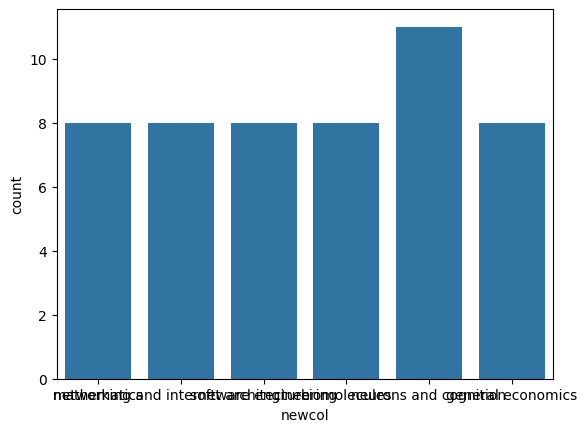

In [3]:
ax = sns.countplot(x="newcol", data=df)

Data Cleaning

In [6]:
df.head()

,content,newcol
0,new view hypercube genus introduction hypercub...,mathematics
1,"extremal problem martingale transforms, introd...",mathematics
2,interacting stochastic process sparse random g...,mathematics
3,complete space like self expanders minkovski s...,mathematics
4,quick probability oriented introduction operat...,mathematics


In [7]:
sample_corpora = df['content'].iloc[:2].values
sample_corpora

array(['new view hypercube genus introduction hypercubes two cell embeddings graph genus embeddings hypercubes parallel genus embeddings instruction ringel discovered formula minimum genus torus dimensional hypercube graph embedded give new proof formula building surface union certain face hypercube skeleton odd dimension entire skeleton decomposes copy surface, intersection two copy hypercube graph graph drawn surface without crossed edge kuratowski theorem theorem implies complete bipartite graph figure cannot drawn sphere plane without crossed edge min one try draw sphere, always fail however, drawn torus, shown figure genus graph denoted least integer drawn closed, connected, orientable surface genus without edge crossing sphere genus surface hole genus thus figure also show together drawing torus genus respectively indeed, ringel proved thus drawing figure optimal genus formula established well known family graph instance, difficult proof simple formula instrumental settling heawo

In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
count_vectorizer = CountVectorizer()
wm = count_vectorizer.fit_transform(sample_corpora)

doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
feat_names = count_vectorizer.get_feature_names_out()


sample_df = pd.DataFrame(data=wm.toarray(), index=doc_names,columns=feat_names)
sample_df

,above,absolutely,according,account,active,add,addition,additional,adjacent,adm,...,word,words,work,write,writing,written,yes,yet,yield,zero
Doc0,0,0,1,0,4,0,2,0,1,0,...,0,0,0,0,0,0,1,0,2,0
Doc1,1,1,3,1,0,2,1,2,0,1,...,1,2,2,5,1,2,0,1,0,5


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(df['content'].values,df['newcol'].values,test_size=0.5,random_state=123,stratify=df['newcol'].values)
tfidf_vectorizer = TfidfVectorizer()

tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)

tfidf_test_vectors = tfidf_vectorizer.transform(X_test)

print(tfidf_train_vectors.shape, tfidf_test_vectors.shape)

(25, 8209) (26, 8209)




*   List item
*   List item



In [10]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

classifier.fit(tfidf_train_vectors,y_train)

RandomForestClassifier()

In [11]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = classifier.predict(tfidf_test_vectors)
print(classification_report(y_test,y_pred))

                                      precision    recall  f1-score   support

                        biomolecules       0.67      0.50      0.57         4
                   general economics       0.33      0.25      0.29         4
                         mathematics       0.40      1.00      0.57         4
networking and internet architecture       0.67      0.50      0.57         4
               neurons and cognition       0.80      0.67      0.73         6
                software engineering       1.00      0.50      0.67         4

                            accuracy                           0.58        26
                           macro avg       0.64      0.57      0.57        26
                        weighted avg       0.66      0.58      0.58        26



['TN\n2', 'FP\n0', 'FN\n0', 'TP\n1', 'Class5\n1', 'Class6\n0', 'Class7\n0', 'Class8\n1', 'Class9\n3', 'Class10\n0', 'Class11\n0', 'Class12\n0', 'Class13\n0', 'Class14\n0', 'Class15\n4', 'Class16\n0', 'Class17\n0', 'Class18\n0', 'Class19\n0', 'Class20\n0', 'Class21\n2', 'Class22\n2', 'Class23\n0', 'Class24\n0', 'Class25\n0', 'Class26\n1', 'Class27\n1', 'Class28\n0', 'Class29\n4', 'Class30\n0', 'Class31\n1', 'Class32\n1', 'Class33\n0', 'Class34\n0', 'Class35\n0', 'Class36\n2']


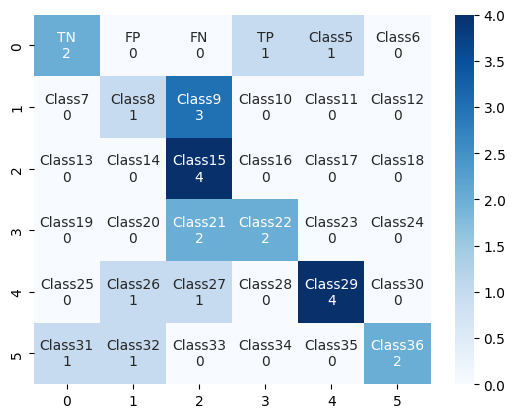

In [12]:
import numpy as np
cnf_matrix = confusion_matrix(y_test,y_pred)
group_names = ['TN','FP','FN','TP', 'Class5', 'Class6', 'Class7', 'Class8', 'Class9', 'Class10', 'Class11', 'Class12', 'Class13', 'Class14', 'Class15', 'Class16', 'Class17', 'Class18','Class19', 'Class20', 'Class21', 'Class22', 'Class23', 'Class24', 'Class25', 'Class26', 'Class27', 'Class28', 'Class29', 'Class30', 'Class31', 'Class32', 'Class33', 'Class34', 'Class35', 'Class36'] #must have
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
print(labels)
#labels = np.asarray(labels).reshape(2,2)
#print(data, labels)
labels = np.asarray(labels).reshape(cnf_matrix.shape)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');

In [14]:
new_data = pd.read_csv('medium_content_new.csv')
texts_to_predict = new_data['content'].values
tfidf_test_vectors = tfidf_vectorizer.transform(texts_to_predict)
predictions = classifier.predict(tfidf_test_vectors)
new_data['predictions'] = predictions
new_data.to_csv('predicted_output.csv', index=False)